<a href="https://colab.research.google.com/github/oulbacha-ilyas/Machine-Learning-For-Stock-Market-Prediction/blob/main/experiment5dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Data Preprocessing

In [ ]:
####Selecting the best structure


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import Normalizer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import statistics
from datetime import datetime


dataset=pd.read_csv("fixations.csv")
fixationX=dataset[["start timestamp [ns]","end timestamp [ns]","duration [ms]","fixation x [px]"]]

facebook=pd.read_csv("Facebook.csv")
apple=pd.read_csv("Apple.csv")
amazon=pd.read_csv("Amazon.csv")
netflix=pd.read_csv("Netflix.csv")
google=pd.read_csv("Google.csv")


### replacing missing values
mean = facebook['Open'].mean()
facebook['Open'].fillna(mean, inplace=True)
mean = facebook['High'].mean()
facebook['High'].fillna(mean, inplace=True)
mean = facebook['Low'].mean()
facebook['Low'].fillna(mean, inplace=True)
mean = facebook['Close'].mean()
facebook['Close'].fillna(mean, inplace=True)
mean = facebook['Adj Close'].mean()
facebook['Adj Close'].fillna(mean, inplace=True)
mean = facebook['Volume'].mean()
facebook['Volume'].fillna(mean, inplace=True)

mean = apple['Open'].mean()
apple['Open'].fillna(mean, inplace=True)
mean = apple['High'].mean()
apple['High'].fillna(mean, inplace=True)
mean = apple['Low'].mean()
apple['Low'].fillna(mean, inplace=True)
mean = apple['Close'].mean()
apple['Close'].fillna(mean, inplace=True)
mean = apple['Adj Close'].mean()
apple['Adj Close'].fillna(mean, inplace=True)
mean = apple['Volume'].mean()
apple['Volume'].fillna(mean, inplace=True)

mean = amazon['Open'].mean()
amazon['Open'].fillna(mean, inplace=True)
mean = amazon['High'].mean()
amazon['High'].fillna(mean, inplace=True)
mean = amazon['Low'].mean()
amazon['Low'].fillna(mean, inplace=True)
mean = amazon['Close'].mean()
amazon['Close'].fillna(mean, inplace=True)
mean = amazon['Adj Close'].mean()
amazon['Adj Close'].fillna(mean, inplace=True)
mean = amazon['Volume'].mean()
amazon['Volume'].fillna(mean, inplace=True)

mean = netflix['Open'].mean()
netflix['Open'].fillna(mean, inplace=True)
mean = netflix['High'].mean()
netflix['High'].fillna(mean, inplace=True)
mean = netflix['Low'].mean()
netflix['Low'].fillna(mean, inplace=True)
mean = netflix['Close'].mean()
netflix['Close'].fillna(mean, inplace=True)
mean = netflix['Adj Close'].mean()
netflix['Adj Close'].fillna(mean, inplace=True)
mean = netflix['Volume'].mean()
netflix['Volume'].fillna(mean, inplace=True)

mean = google['Open'].mean()
google['Open'].fillna(mean, inplace=True)
mean = google['High'].mean()
google['High'].fillna(mean, inplace=True)
mean = google['Low'].mean()
google['Low'].fillna(mean, inplace=True)
mean = google['Close'].mean()
google['Close'].fillna(mean, inplace=True)
mean = google['Adj Close'].mean()
google['Adj Close'].fillna(mean, inplace=True)
mean = google['Volume'].mean()
google['Volume'].fillna(mean, inplace=True)


facebook['Date']=facebook['Date'].astype('string')
amazon['Date']=amazon['Date'].astype('string')
apple['Date']=apple['Date'].astype('string')
netflix['Date']=netflix['Date'].astype('string')
google['Date']=google['Date'].astype('string')



### changing date to timestamp
format = "%Y-%m-%d"
facebook['timestamp']=np.nan

for i in facebook.index:
  date_string = facebook.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  facebook.iloc[i,7]=timestamp

facebook['Date']=facebook['timestamp']
facebook=facebook.drop(['timestamp'],axis=1)
facebook= facebook.rename(columns = {"Date":"Timestamp"})
facebook.head()

#####
format = "%Y-%m-%d"
amazon['timestamp']=np.nan

for i in amazon.index:
  date_string = amazon.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  amazon.iloc[i,7]=timestamp

amazon['Date']=amazon['timestamp']
amazon=amazon.drop(['timestamp'],axis=1)
amazon= amazon.rename(columns = {"Date":"Timestamp"})
amazon.head()

format = "%Y-%m-%d"
apple['timestamp']=np.nan

for i in apple.index:
  date_string = apple.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  apple.iloc[i,7]=timestamp

apple['Date']=apple['timestamp']
apple=apple.drop(['timestamp'],axis=1)
apple= apple.rename(columns = {"Date":"Timestamp"})
apple.head()

format = "%Y-%m-%d"
netflix['timestamp']=np.nan

for i in netflix.index:
  date_string = netflix.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  netflix.iloc[i,7]=timestamp

netflix['Date']=netflix['timestamp']
netflix=netflix.drop(['timestamp'],axis=1)
netflix= netflix.rename(columns = {"Date":"Timestamp"})
netflix.head()

format = "%Y-%m-%d"
google['timestamp']=np.nan

for i in google.index:
  date_string = google.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  google.iloc[i,7]=timestamp

google['Date']=google['timestamp']
google=google.drop(['timestamp'],axis=1)
google= google.rename(columns = {"Date":"Timestamp"})
google.head()



amazon.describe()
#####


,Timestamp,Open,High,Low,Close,Adj Close,Volume
count,5.852000e+03,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5.852000e+03
mean,1.230605e+09,377.469557,381.737827,372.815253,377.500736,377.500736,7.512673e+06
std,2.118809e+08,596.291033,602.615299,589.226694,596.287464,596.287464,7.278144e+06
min,8.636544e+08,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,1.047406e+09,37.995000,38.590000,37.247501,37.950001,37.950001,3.681975e+06
50%,1.230638e+09,83.699997,85.029999,82.055000,83.602501,83.602501,5.652850e+06
75%,1.413958e+09,360.852501,365.794991,357.877510,362.217506,362.217506,8.517450e+06
max,1.597363e+09,3251.060059,3344.290039,3165.429932,3225.000000,3225.000000,1.043292e+08


# 2) Machine Learning Models Comparison

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

   Size Number Of Features      RMSE LR Adjusted R2    RMSE ANN    Difference
0   0.2                  1   176.070894    0.013007  214.824339    -38.753445
1   0.4                  2   6851.31911    0.003523  163.287751   6688.031358
2   0.6                  2  4377.710223    0.011702  180.428675   4197.281548
3   0.8                  2  10429.42802    0.009127  157.894344  10271.533677
4   1.0                  3  1404.604161    0.009643  168.860564   1235.743598


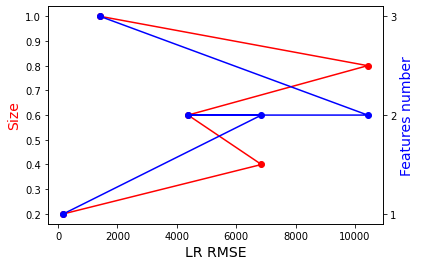

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import random
from random import sample
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#samples=[fixationX['start timestamp [ns]'],fixationX[['start timestamp [ns]',''end timestamp [ns]'']]]
predictors=[fixationX.iloc[:,[0,3]],fixationX.iloc[:,[0,1,3]],fixationX.iloc[:,[0,2,3]],fixationX.iloc[:,[1,2,3]],fixationX.iloc[:,[0,1,2,3]]]
results=pd.DataFrame(columns=[['Predictors','LR','Adjusted R2','ANN','Difference']])
results['Predictors']=['Start_Time','Start&End_Time','Start&Duration','End&Duration','Start&End_Time&Duration']

sizes=[0.2,0.4,0.6,0.8,1]

results_fix=pd.DataFrame(columns=['Size','Number Of Features','RMSE LR','Adjusted R2','RMSE ANN','Difference'])
results_fix['Size']=sizes
results_fix['Number Of Features']=['1','2','2','2','3']
for i in range(5):
  
  #sampling
  ##selecting the sample that is supposed to have missing values
  fixationX_sample=predictors[i]
  fixationX_sample=fixationX.sample(n=round(1023*sizes[i]))


  ##Plot the distribution of sample with missing values
  #y=fixationX['fixation x [px]'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
  #plt.title('Missing values size = {}')
  #plt.show()

  ######training the models
  ###Linear Regression
  y=fixationX_sample['fixation x [px]']
  X=fixationX_sample.drop(columns="fixation x [px]")

  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)
  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()

  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  y_pred_train = model_lr.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  correlation=LinearRegression()
  correlation=correlation.fit(X,y)
  r2= correlation.score(X,y)
  adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
  
  results_fix.iloc[i,2]=rmse_test
  results_fix.iloc[i,3]=adj_r2
  #testing performance graph

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)
  y_pred_train =Fixation_position.predict(X_train)

  #print(classifier.predict(X_test))
  #rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  results_fix.iloc[i,4]=rmse_test
  results_fix.iloc[i,5]=results_fix.iloc[i,2]-results_fix.iloc[i,4]
#results["Difference"]=results["LR"]-results["ANN"]
print(results_fix)



fig,ax = plt.subplots()
# make a plot
ax.plot(results_fix['RMSE LR'],results_fix['Size'],
        color="red", 
        marker="o")
# set x-axis label

ax.set_xlabel("LR RMSE", fontsize = 14)
# set y-axis label
ax.set_ylabel("Size",
              color="red",
              fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(results_fix['RMSE LR'], results_fix['Number Of Features'],color="blue",marker="o")
ax2.set_ylabel("Features number",color="blue",fontsize=14)
plt.show()



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

   Size Number Of Features          RMSE LR Adjusted R2         RMSE ANN  \
0   0.1                  1  16479534.944026    0.304103  18256169.262435   
1   0.3                  2  17589118.500324    0.367721  17917428.546149   
2   0.5                  3  17305401.606623    0.377686  21007852.768897   
3   0.7                  4  20588497.679181    0.377451  21815861.812204   
4   0.9                  5  22088637.652665    0.332933  23373806.265288   
5   1.0                  6   22448643.04123    0.358759  26294112.218303   

       Difference  
0 -1776634.318409  
1  -328310.045826  
2 -3702451.162274  
3 -1227364.133023  
4 -1285168.612623  
5 -3845469.177073  


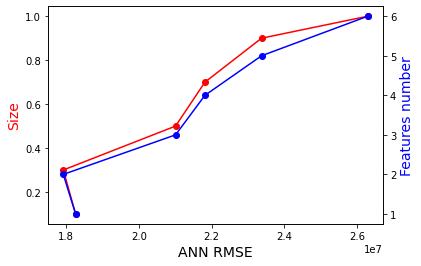

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import random
from random import sample
import seaborn as sns
from sklearn.preprocessing import StandardScaler
fixationX=facebook
#samples=[fixationX['start timestamp [ns]'],fixationX[['start timestamp [ns]',''end timestamp [ns]'']]]
predictors=[fixationX.iloc[:,[0,6]],fixationX.iloc[:,[0,1,6]],fixationX.iloc[:,[0,1,2,6]],fixationX.iloc[:,[1,2,3,6]],fixationX.iloc[:,[0,1,2,3,4,6]],fixationX.iloc[:,[0,1,2,3,4,5,6]]]
results=pd.DataFrame(columns=[['Predictors','LR','Adjusted R2','ANN','Difference']])
results['Predictors']=['Start_Time','Start&End_Time','Start&Duration','End&Duration','Start&End_Time&Duration']

sizes=[0.10,0.30,0.50,0.70,0.90,1]

results_fb=pd.DataFrame(columns=['Size','Number Of Features','RMSE LR','Adjusted R2','RMSE ANN','Difference'])
results_fb['Size']=sizes
results_fb['Number Of Features']=['1','2','3','4','5','6']
for i in range(6):
  
  #sampling
  ##selecting the sample that is supposed to have missing values
  fixationX_sample=predictors[i]
  fixationX_sample=fixationX.sample(n=round(1023*sizes[i]))


  ##Plot the distribution of sample with missing values
  #y=fixationX['fixation x [px]'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
  #plt.title('Missing values size = {}')
  #plt.show()

  ######training the models
  ###Linear Regression
  y=fixationX_sample['Volume']
  X=fixationX_sample.drop(columns="Volume")

  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)
  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()

  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  y_pred_train = model_lr.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  correlation=LinearRegression()
  correlation=correlation.fit(X,y)
  r2= correlation.score(X,y)
  adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
  
  results_fb.iloc[i,2]=rmse_test
  results_fb.iloc[i,3]=adj_r2
  #testing performance graph

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)
  y_pred_train =Fixation_position.predict(X_train)

  #print(classifier.predict(X_test))
  #rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  results_fb.iloc[i,4]=rmse_test
  results_fb.iloc[i,5]=results_fb.iloc[i,2]-results_fb.iloc[i,4]
#results["Difference"]=results["LR"]-results["ANN"]
print(results_fb)



fig,ax = plt.subplots()
# make a plot
ax.plot(results_fb['RMSE ANN'],results_fb['Size'],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("ANN RMSE", fontsize = 14)
# set y-axis label
ax.set_ylabel("Size",
              color="red",
              fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(results_fb['RMSE ANN'], results_fb['Number Of Features'],color="blue",marker="o")
ax2.set_ylabel("Features number",color="blue",fontsize=14)
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

   Size Number Of Features         RMSE LR Adjusted R2        RMSE ANN  \
0   0.1                  1  5799052.925947    0.140425  6377273.726377   
1   0.3                  2  5467599.818095    0.195945   6224752.37597   
2   0.5                  3  6448329.449289    0.141163  6406794.446457   
3   0.7                  4  5816803.539856    0.162892  6200072.003294   
4   0.9                  5  7522313.284937    0.191182  7973782.917466   
5   1.0                  6  4676148.654886    0.207148  4894960.790432   

      Difference  
0  -578220.80043  
1 -757152.557876  
2   41535.002832  
3 -383268.463438  
4 -451469.632529  
5 -218812.135546  


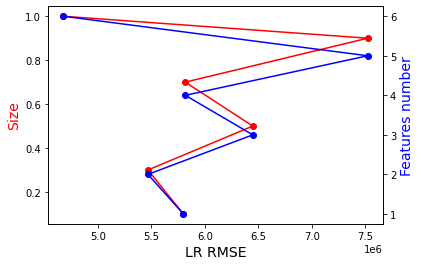

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import random
from random import sample
import seaborn as sns
from sklearn.preprocessing import StandardScaler
fixationX=amazon
#samples=[fixationX['start timestamp [ns]'],fixationX[['start timestamp [ns]',''end timestamp [ns]'']]]
predictors=[fixationX.iloc[:,[0,6]],fixationX.iloc[:,[0,1,6]],fixationX.iloc[:,[0,1,2,6]],fixationX.iloc[:,[1,2,3,6]],fixationX.iloc[:,[0,1,2,3,4,6]],fixationX.iloc[:,[0,1,2,3,4,5,6]]]

sizes=[0.10,0.30,0.50,0.70,0.90,1]

results_am=pd.DataFrame(columns=['Size','Number Of Features','RMSE LR','Adjusted R2','RMSE ANN','Difference'])
results_am['Size']=sizes
results_am['Number Of Features']=['1','2','3','4','5','6']
for i in range(6):
  
  #sampling
  ##selecting the sample that is supposed to have missing values
  fixationX_sample=predictors[i]
  fixationX_sample=fixationX.sample(n=round(1023*sizes[i]))


  ##Plot the distribution of sample with missing values
  #y=fixationX['fixation x [px]'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
  #plt.title('Missing values size = {}')
  #plt.show()

  ######training the models
  ###Linear Regression
  y=fixationX_sample['Volume']
  X=fixationX_sample.drop(columns="Volume")

  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)
  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()

  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  y_pred_train = model_lr.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  correlation=LinearRegression()
  correlation=correlation.fit(X,y)
  r2= correlation.score(X,y)
  adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
  
  results_am.iloc[i,2]=rmse_test
  results_am.iloc[i,3]=adj_r2
  #testing performance graph

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)
  y_pred_train =Fixation_position.predict(X_train)

  #print(classifier.predict(X_test))
  #rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  results_am.iloc[i,4]=rmse_test
  results_am.iloc[i,5]=results_am.iloc[i,2]-results_am.iloc[i,4]
#results["Difference"]=results["LR"]-results["ANN"]
print(results_am)



fig,ax = plt.subplots()
# make a plot
ax.plot(results_am['RMSE LR'],results_am['Size'],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("LR RMSE", fontsize = 14)
# set y-axis label
ax.set_ylabel("Size",
              color="red",
              fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(results_am['RMSE LR'], results_am['Number Of Features'],color="blue",marker="o")
ax2.set_ylabel("Features number",color="blue",fontsize=14)
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


   Size Number Of Features           RMSE LR Adjusted R2          RMSE ANN  \
0   0.1                  1  271215617.917972    0.408845  349746755.457467   
1   0.3                  2  298121671.768801     0.31593  349853558.229019   
2   0.5                  3  253901821.093886    0.368076  277511376.467024   
3   0.7                  4  235138206.898623     0.30847  237380744.200917   
4   0.9                  5  271336779.065049    0.342116  249038352.900569   
5   1.0                  6  274190503.996379    0.259449  277431691.619656   

        Difference  
0 -78531137.539495  
1 -51731886.460218  
2 -23609555.373138  
3  -2242537.302293  
4  22298426.164481  
5  -3241187.623277  


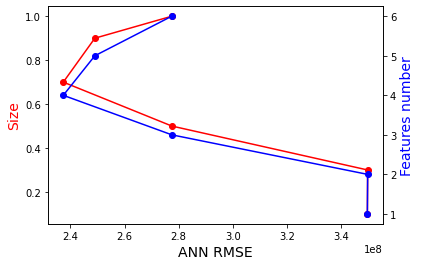

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import random
from random import sample
import seaborn as sns
from sklearn.preprocessing import StandardScaler
fixationX=apple
#samples=[fixationX['start timestamp [ns]'],fixationX[['start timestamp [ns]',''end timestamp [ns]'']]]
predictors=[fixationX.iloc[:,[0,6]],fixationX.iloc[:,[0,1,6]],fixationX.iloc[:,[0,1,2,6]],fixationX.iloc[:,[1,2,3,6]],fixationX.iloc[:,[0,1,2,3,4,6]],fixationX.iloc[:,[0,1,2,3,4,5,6]]]

sizes=[0.10,0.30,0.50,0.70,0.90,1]

results_ap=pd.DataFrame(columns=['Size','Number Of Features','RMSE LR','Adjusted R2','RMSE ANN','Difference'])
results_ap['Size']=sizes
results_ap['Number Of Features']=['1','2','3','4','5','6']
for i in range(6):
  
  #sampling
  ##selecting the sample that is supposed to have missing values
  fixationX_sample=predictors[i]
  fixationX_sample=fixationX.sample(n=round(1023*sizes[i]))


  ##Plot the distribution of sample with missing values
  #y=fixationX['fixation x [px]'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
  #plt.title('Missing values size = {}')
  #plt.show()

  ######training the models
  ###Linear Regression
  y=fixationX_sample['Volume']
  X=fixationX_sample.drop(columns="Volume")

  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)
  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()

  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  y_pred_train = model_lr.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  correlation=LinearRegression()
  correlation=correlation.fit(X,y)
  r2= correlation.score(X,y)
  adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
  
  results_ap.iloc[i,2]=rmse_test
  results_ap.iloc[i,3]=adj_r2
  #testing performance graph

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)
  y_pred_train =Fixation_position.predict(X_train)

  #print(classifier.predict(X_test))
  #rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  results_ap.iloc[i,4]=rmse_test
  results_ap.iloc[i,5]=results_ap.iloc[i,2]-results_ap.iloc[i,4]
#results["Difference"]=results["LR"]-results["ANN"]
print(results_ap)



fig,ax = plt.subplots()
# make a plot
ax.plot(results_ap['RMSE ANN'],results_ap['Size'],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("ANN RMSE", fontsize = 14)
# set y-axis label
ax.set_ylabel("Size",
              color="red",
              fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(results_ap['RMSE ANN'], results_ap['Number Of Features'],color="blue",marker="o")
ax2.set_ylabel("Features number",color="blue",fontsize=14)
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

   Size Number Of Features          RMSE LR Adjusted R2         RMSE ANN  \
0   0.1                  1  13108521.166346    0.060863  19275966.242055   
1   0.3                  2  18714639.858716    0.073904  19475303.350138   
2   0.5                  3  13149704.977428     0.12647    13643733.8315   
3   0.7                  4  20980520.826906     0.14225   21620884.64842   
4   0.9                  5  18869147.443444    0.087129   19450111.66883   
5   1.0                  6   19955265.53359    0.111039  20407677.454515   

       Difference  
0 -6167445.075709  
1  -760663.491422  
2  -494028.854072  
3  -640363.821514  
4  -580964.225387  
5  -452411.920925  


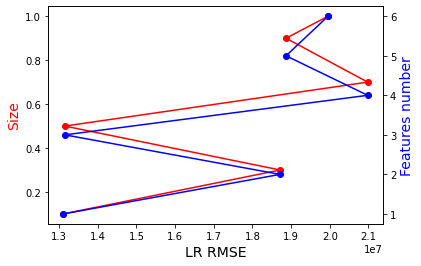

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import random
from random import sample
import seaborn as sns
from sklearn.preprocessing import StandardScaler
fixationX=netflix
#samples=[fixationX['start timestamp [ns]'],fixationX[['start timestamp [ns]',''end timestamp [ns]'']]]
predictors=[fixationX.iloc[:,[0,6]],fixationX.iloc[:,[0,1,6]],fixationX.iloc[:,[0,1,2,6]],fixationX.iloc[:,[1,2,3,6]],fixationX.iloc[:,[0,1,2,3,4,6]],fixationX.iloc[:,[0,1,2,3,4,5,6]]]

sizes=[0.10,0.30,0.50,0.70,0.90,1]

results_nt=pd.DataFrame(columns=['Size','Number Of Features','RMSE LR','Adjusted R2','RMSE ANN','Difference'])
results_nt['Size']=sizes
results_nt['Number Of Features']=['1','2','3','4','5','6']
for i in range(6):
  
  #sampling
  ##selecting the sample that is supposed to have missing values
  fixationX_sample=predictors[i]
  fixationX_sample=fixationX.sample(n=round(1023*sizes[i]))


  ##Plot the distribution of sample with missing values
  #y=fixationX['fixation x [px]'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
  #plt.title('Missing values size = {}')
  #plt.show()

  ######training the models
  ###Linear Regression
  y=fixationX_sample['Volume']
  X=fixationX_sample.drop(columns="Volume")

  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)
  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()

  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  y_pred_train = model_lr.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  correlation=LinearRegression()
  correlation=correlation.fit(X,y)
  r2= correlation.score(X,y)
  adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
  
  results_nt.iloc[i,2]=rmse_test
  results_nt.iloc[i,3]=adj_r2
  #testing performance graph

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)
  y_pred_train =Fixation_position.predict(X_train)

  #print(classifier.predict(X_test))
  #rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  results_nt.iloc[i,4]=rmse_test
  results_nt.iloc[i,5]=results_nt.iloc[i,2]-results_nt.iloc[i,4]
#results["Difference"]=results["LR"]-results["ANN"]
print(results_nt)



fig,ax = plt.subplots()
# make a plot
ax.plot(results_nt['RMSE LR'],results_nt['Size'],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("LR RMSE", fontsize = 14)
# set y-axis label
ax.set_ylabel("Size",
              color="red",
              fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(results_nt['RMSE LR'], results_nt['Number Of Features'],color="blue",marker="o")
ax2.set_ylabel("Features number",color="blue",fontsize=14)
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

   Size Number Of Features         RMSE LR Adjusted R2        RMSE ANN  \
0   0.1                  1  3635277.260901    0.655676   4967000.40306   
1   0.3                  2  4811128.049451    0.565123  6528350.640222   
2   0.5                  3  5181262.000007     0.56613  4813724.571251   
3   0.7                  4  4745649.525484    0.549711  5588584.921816   
4   0.9                  5  4490381.832853    0.564486  4796033.501747   
5   1.0                  6  5146442.189951    0.553417  5157942.929925   

       Difference  
0 -1331723.142158  
1 -1717222.590771  
2   367537.428756  
3  -842935.396332  
4  -305651.668894  
5   -11500.739974  


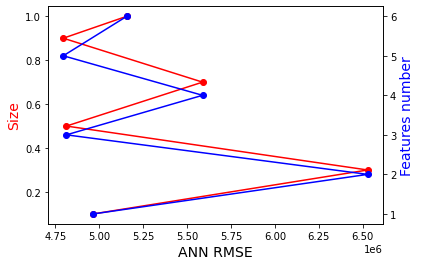

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import random
from random import sample
import seaborn as sns
from sklearn.preprocessing import StandardScaler
fixationX=google
#samples=[fixationX['start timestamp [ns]'],fixationX[['start timestamp [ns]',''end timestamp [ns]'']]]
predictors=[fixationX.iloc[:,[0,6]],fixationX.iloc[:,[0,1,6]],fixationX.iloc[:,[0,1,2,6]],fixationX.iloc[:,[1,2,3,6]],fixationX.iloc[:,[0,1,2,3,4,6]],fixationX.iloc[:,[0,1,2,3,4,5,6]]]

sizes=[0.10,0.30,0.50,0.70,0.90,1]

results_gg=pd.DataFrame(columns=['Size','Number Of Features','RMSE LR','Adjusted R2','RMSE ANN','Difference'])
results_gg['Size']=sizes
results_gg['Number Of Features']=['1','2','3','4','5','6']
for i in range(6):
  
  #sampling
  ##selecting the sample that is supposed to have missing values
  fixationX_sample=predictors[i]
  fixationX_sample=fixationX.sample(n=round(1023*sizes[i]))


  ##Plot the distribution of sample with missing values
  #y=fixationX['fixation x [px]'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
  #plt.title('Missing values size = {}')
  #plt.show()

  ######training the models
  ###Linear Regression
  y=fixationX_sample['Volume']
  X=fixationX_sample.drop(columns="Volume")

  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)
  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()

  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  y_pred_train = model_lr.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  correlation=LinearRegression()
  correlation=correlation.fit(X,y)
  r2= correlation.score(X,y)
  adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
  
  results_gg.iloc[i,2]=rmse_test
  results_gg.iloc[i,3]=adj_r2
  #testing performance graph

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)
  y_pred_train =Fixation_position.predict(X_train)

  #print(classifier.predict(X_test))
  #rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  results_gg.iloc[i,4]=rmse_test
  results_gg.iloc[i,5]=results_gg.iloc[i,2]-results_gg.iloc[i,4]
#results["Difference"]=results["LR"]-results["ANN"]
print(results_gg)



fig,ax = plt.subplots()
# make a plot
ax.plot(results_gg['RMSE ANN'],results_gg['Size'],
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("ANN RMSE", fontsize = 14)
# set y-axis label
ax.set_ylabel("Size",
              color="red",
              fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(results_gg['RMSE ANN'], results_gg['Number Of Features'],color="blue",marker="o")
ax2.set_ylabel("Features number",color="blue",fontsize=14)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

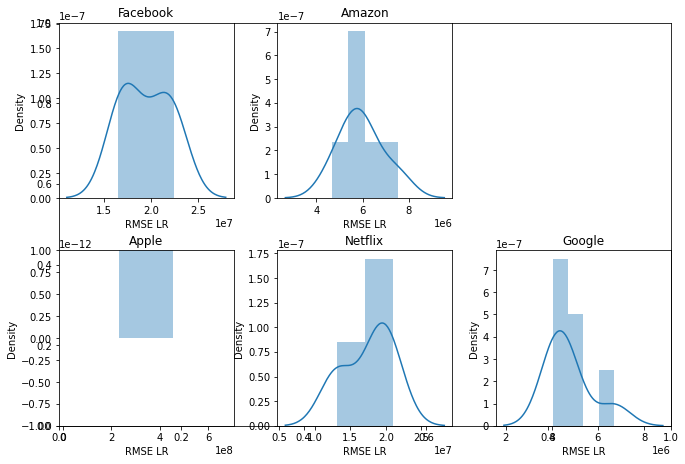

In [ ]:
from matplotlib.pylab import title
from scipy.stats import shapiro
from scipy.stats import kstest
import matplotlib.gridspec as gridspec

import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

fig, axes = plt.subplots()
gs = gridspec.GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

sns.distplot(results_fb['RMSE LR'],ax=ax1).set(title="Facebook")
sns.distplot(results_am['RMSE LR'],ax=ax2).set(title="Amazon")
sns.distplot(results_ap['RMSE LR'],ax=ax3).set(title="Apple")
sns.distplot(results_nt['RMSE LR'],ax=ax4).set(title="Netflix")
sns.distplot(results_gg['RMSE LR'],ax=ax5).set(title="Google")
fig.set_figheight(7)
fig.set_figwidth(10)

plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.3)


In [ ]:
#perform Kolmogorov-Smirnov test


normality=pd.DataFrame(columns=['Dataset','S-W statistic','S-W p-value','K-S statistic','K-S p-value'])
normality['Dataset']=['Facebook','Apple','Amazon','Netflix','Google']



#s1,p1=shapiro(results_fix['RMSE LR'])
s2,p2=shapiro(results_fb['RMSE LR'])
s3,p3=shapiro(results_ap['RMSE LR'])
s4,p4=shapiro(results_am['RMSE LR'])
s5,p5=shapiro(results_nt['RMSE LR'])
s6,p6=shapiro(results_gg['RMSE LR'])


normality['S-W statistic']=[s2,s3,s4,s5,s6]
normality['S-W p-value']=[p2,p3,p4,p5,p6]

#fix=results_fix['RMSE LR'].values.tolist()
fb=results_fb['RMSE LR'].values.tolist()
ap=results_ap['RMSE LR'].values.tolist()
am=results_am['RMSE LR'].values.tolist()
nt=results_nt['RMSE LR'].values.tolist()
gg=results_gg['RMSE LR'].values.tolist()

#s1,p1=kstest(fix, 'norm')
s2,p2=kstest(fb, 'norm')
s3,p3=kstest(ap, 'norm')
s4,p4=kstest(am, 'norm')
s5,p5=kstest(nt, 'norm')
s6,p6=kstest(gg, 'norm')

normality['K-S statistic']=[s2,s3,s4,s5,s6]
normality['K-S p-value']=[p2,p3,p4,p5,p6]

print(normality)


    Dataset  S-W statistic  S-W p-value  K-S statistic  K-S p-value
0  Facebook       0.868811     0.221507            1.0          0.0
1     Apple       0.760864     0.025393            1.0          0.0
2    Amazon       0.961576     0.831803            1.0          0.0
3   Netflix       0.817456     0.083879            1.0          0.0
4    Google       0.755923     0.022751            1.0          0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

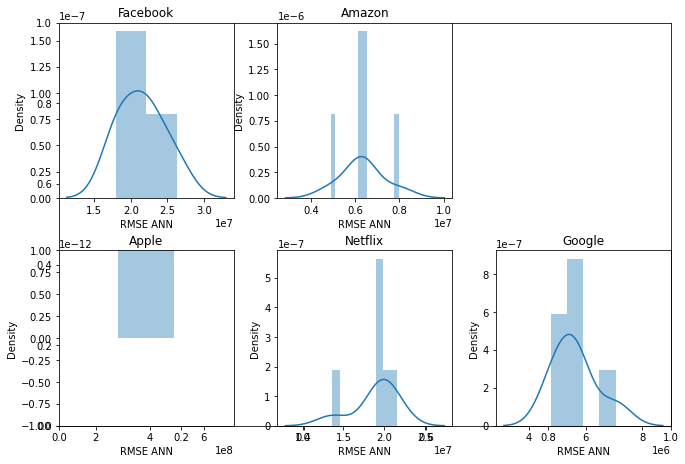

In [ ]:
from matplotlib.pylab import title
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon

import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

fig, axes = plt.subplots(2, 3)

#create chart in each subplot
#sns.boxplot(data=df, x='team', y='points', ax=axes[0,0])
#sns.boxplot(data=df, x='team', y='assists', ax=axes[0,1])
#sns.distplot(results_fix['RMSE ANN'],ax=axes[0,0]).set(title="Fixations")
sns.distplot(results_fb['RMSE ANN'],ax=axes[0,1]).set(title="Facebook")
sns.distplot(results_am['RMSE ANN'],ax=axes[0,2]).set(title="Amazon")
sns.distplot(results_ap['RMSE ANN'],ax=axes[1,0]).set(title="Apple")
sns.distplot(results_nt['RMSE ANN'],ax=axes[1,1]).set(title="Netflix")
sns.distplot(results_gg['RMSE ANN'],ax=axes[1,2]).set(title="Google")
fig.set_figheight(7)
fig.set_figwidth(10)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [ ]:
#perform Kolmogorov-Smirnov test

#s1,p1=shapiro(results_fix['RMSE ANN'])
s2,p2=shapiro(results_fb['RMSE ANN'])
s3,p3=shapiro(results_ap['RMSE ANN'])
s4,p4=shapiro(results_am['RMSE ANN'])
s5,p5=shapiro(results_nt['RMSE ANN'])
s6,p6=shapiro(results_gg['RMSE ANN'])

normality=pd.DataFrame()
normality['Dataset']=['Facebook','Apple','Amazon','Netflix','Google']
normality['S-W statistic']=[s2,s3,s4,s5,s6]
normality['S-W p-value']=[p2,p3,p4,p5,p6]

#fix=results_fix['RMSE ANN'].values.tolist()
fb=results_fb['RMSE ANN'].values.tolist()
ap=results_ap['RMSE ANN'].values.tolist()
am=results_am['RMSE ANN'].values.tolist()
nt=results_nt['RMSE ANN'].values.tolist()
gg=results_gg['RMSE ANN'].values.tolist()

#s1,p1=kstest(fix, 'norm')
s2,p2=kstest(fb, 'norm')
s3,p3=kstest(ap, 'norm')
s4,p4=kstest(am, 'norm')
s5,p5=kstest(nt, 'norm')
s6,p6=kstest(gg, 'norm')

normality['K-S statistic']=[s2,s3,s4,s5,s6]
normality['K-S p-value']=[p2,p3,p4,p5,p6]

print(normality)


    Dataset  S-W statistic  S-W p-value  K-S statistic  K-S p-value
0  Facebook       0.947187     0.717455            1.0          0.0
1     Apple       0.756068     0.022825            1.0          0.0
2    Amazon       0.877203     0.256459            1.0          0.0
3   Netflix       0.780488     0.038951            1.0          0.0
4    Google       0.875766     0.250171            1.0          0.0


In [ ]:
import scipy.stats as stats

lr=pd.DataFrame()
#lr['fix']=results_fix.iloc[:,2]
lr['fb']=results_fb.iloc[:,2]
lr['ap']=results_ap.iloc[:,2]
lr['am']=results_am.iloc[:,2]
lr['nt']=results_nt.iloc[:,2]
lr['gg']=results_gg.iloc[:,2]
ann=pd.DataFrame()
#ann['fix']=results_fix.iloc[:,4]
ann['fb']=results_fb.iloc[:,4]
ann['ap']=results_ap.iloc[:,4]
ann['am']=results_am.iloc[:,4]
ann['nt']=results_nt.iloc[:,4]
ann['gg']=results_gg.iloc[:,4]



wilcoxon_test=pd.DataFrame(columns=['Dataset','Wilcoxon statistic','p-value'])
dataset=['Facebook','Apple','Amazon','Netflix','Google']
for i in range(5):
  s1=lr.iloc[:,i].values.flatten()
  s2=ann.iloc[:,i].values.flatten()
  s,p=stats.wilcoxon(s1,s2)
  wilcoxon_test=wilcoxon_test.append({'Dataset':dataset[i],'Wilcoxon statistic':s,'p-value':p},ignore_index=True)
print(wilcoxon_test)


    Dataset  Wilcoxon statistic  p-value
0  Facebook                 0.0  0.03125
1     Apple                 2.0  0.09375
2    Amazon                 1.0  0.06250
3   Netflix                 0.0  0.03125
4    Google                 0.0  0.03125


In [ ]:
###multicomparison
friedman_test=pd.DataFrame(columns=['Model','Friedman statistic','p-value'])

statistic,pvalue=stats.friedmanchisquare(lr['fb'],lr['ap'],lr['am'],lr['nt'],lr['gg'])
friedman_test=friedman_test.append({'Model':'LR in all datasets','Friedman statistic':statistic,'p-value':pvalue},ignore_index=True)


statistic,pvalue=stats.friedmanchisquare(ann['fb'],ann['ap'],ann['am'],ann['nt'],ann['gg'])
friedman_test=friedman_test.append({'Model':'ANN in all datasets','Friedman statistic':statistic,'p-value':pvalue},ignore_index=True)


print(friedman_test)



                 Model  Friedman statistic   p-value
0   LR in all datasets           21.866667  0.000213
1  ANN in all datasets           21.866667  0.000213


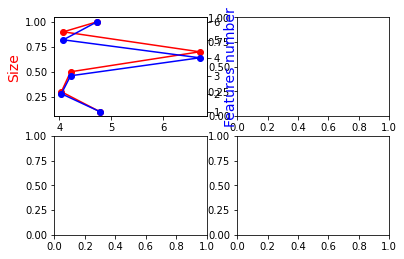

In [ ]:
fig,axes = plt.subplots(2,2)
# make a plot
ax1=axes[0,0]
ax1.plot(results_gg['RMSE LR'],results_gg['Size'],
        color="red", 
        marker="o")
# set x-axis label
ax1.set_xlabel("LR RMSE", fontsize = 14)
# set y-axis label
ax1.set_ylabel("Size",
              color="red",
              fontsize=14)

axTwinx=ax1.twinx()
# make a plot with different y-axis using second axis object
axTwinx.plot(results_gg['RMSE LR'], results_gg['Number Of Features'],color="blue",marker="o")
axTwinx.set_ylabel("Features number",color="blue",fontsize=14)
plt.show()

ax2=axes[0,1]
ax2.plot(results_gg['RMSE ANN'],results_gg['Size'],
        color="red", 
        marker="o")
# set x-axis label
ax2.set_xlabel("ANN RMSE", fontsize = 14)
# set y-axis label
ax2.set_ylabel("Size",
              color="red",
              fontsize=14)

ax2Twix=ax2.twinx()
# make a plot with different y-axis using second axis object
ax2Twix.plot(results_gg['RMSE ANN'], results_gg['Number Of Features'],color="blue",marker="o")
ax2Twix.set_ylabel("Features number",color="blue",fontsize=14)
plt.show()